# Table of Contents
### 1. Importing Libraries & Data
### 2. Key Question 1 Visualizations - Busiest days of the week & Busiest hours of the day
### 3. Key Question 2 - Particular times of day when people spend the most money
### 4. Key Question 3 - Price Range Groupings
### 5. Key Question 4 - Are there certain types of products that are more popular than others?
### 6. Key Question 5
##### - 6.1 - What's the distribution among users in regards to their brand loyalty?
##### - 6.2 - Are there differences in ordering habits based on a customer's loyalty status?
##### 6.3 - Are there differences in ordering habits based on a customer's region?
### 7. Additional Visualizations
##### 7.1 Age
##### 7.2 Income
##### 7.3 Family Status
##### 7.4 Parent
##### 7.5 Pet Owner
##### 7.6 Alcohol Consumer

# 1. Importing Libraries & Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating Path
path = r'/Users/mattwawner/Documents/8-2022-Instacart Basket Analysis'

In [3]:
# Importing 'opc_clean_final' as df

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_clean_final.pkl'))

# 2. Key Question 1 Visualizations

### Busiest days of the week & Busiest hours of the day

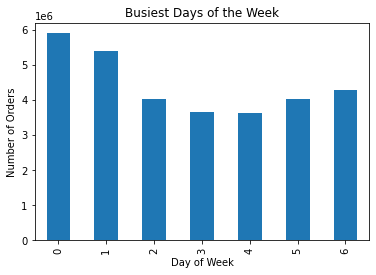

In [4]:
# Create a bar chart with day of week sorted chronologically

bar = df['order_day_of_week'].value_counts().sort_index().plot.bar(xlabel = "Day of Week", ylabel = "Number of Orders", title = "Busiest Days of the Week")

In [5]:
# Exporting the bar graph

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [6]:
df['order_day_of_week'].value_counts(dropna=False)

0    5908820
1    5411898
6    4291443
5    4033838
2    4024857
3    3669692
4    3625138
Name: order_day_of_week, dtype: int64

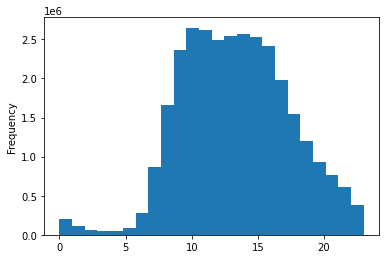

In [7]:
# Creating a histogram of busiest hours of the day

ohod_hist = df['order_hour_of_day'].plot.hist(bins = 24, xlabel = "Hour of Day", ylabel = "Number of Orders")

In [8]:
# Exporting the histogram
ohod_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ohod_hist.png'))

# 3. Key Question 2

### Particular times of day when people spend the most money

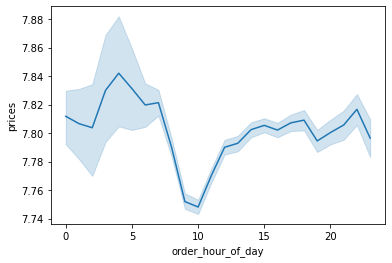

In [9]:
# Creating a line chart of order_hour_of_day vs. prices

line_ohod_prices = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

In [12]:
# Exporting the ohod vs. prices line graph

line_ohod_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_ohod_prices.png'))

# 4. Key Question 3

### Price Range Groupings

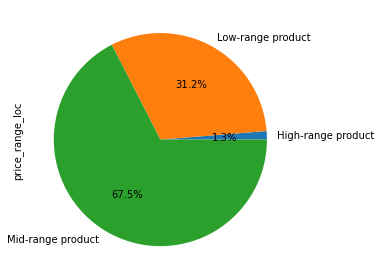

In [42]:
# Creating a pie chart to show the distribution of price ranges

price_pie = df['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [17]:
# Removing the y-axis label

price_pie.yaxis.set_visible(False)

In [23]:
# Exporting price pie chart

price_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_pie.png'))

# 5. Key Question 4

### Are there certain types of products that are more popular than others?

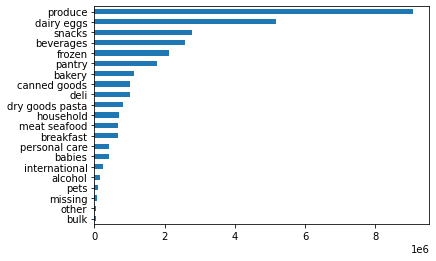

In [33]:
bar_dept = df['department'].value_counts().sort_values().plot.barh()

In [43]:
df['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           671872
personal care       424359
babies              410392
international       255991
alcohol             144674
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [39]:
# Exporting bar_dept

bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_bar.png'))

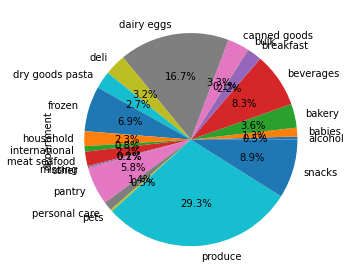

In [48]:
# Creating a pie chart to show the distribution of price ranges

dept_pie = df['department'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

# 6. Key Questions 5

### 6.1 What's the distribution among users in regards to their brand loyalty?

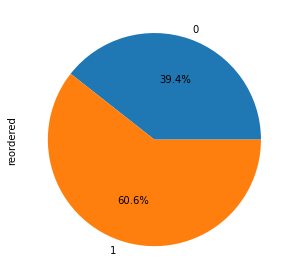

In [47]:
# Creating a pie chart of customers who reordered & those who didn't

reorder_pie = df['reordered'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [49]:
# Removing the y-axis label

reorder_pie.yaxis.set_visible(False)

In [50]:
reorder_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reorder_pie.png'))

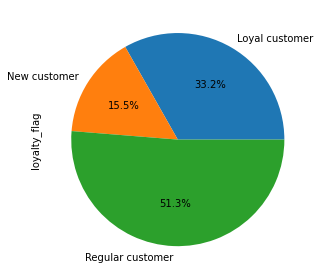

In [55]:
loyal_pie = df['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [59]:
# Removing the y-axis label

loyal_pie.yaxis.set_visible(False)

In [60]:
# Exporting loyalty_flag pie graph

loyal_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_pie.png'))

### 6.2 Are there differences in ordering habits based on a customer's loyalty status?

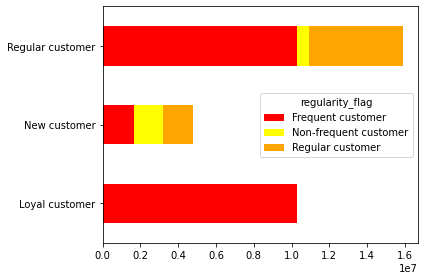

In [74]:
# Comparing the order frequency of the users by loyalty status

loyalty_regularity_sbar = df.groupby('loyalty_flag')['regularity_flag'].value_counts().unstack().plot.barh(stacked = True, ylabel = 'Number of Users',xlabel = '', color = ['red', 'yellow', 'orange'])

In [75]:
# Exporting loyalty_regularity_sbar

loyalty_regularity_sbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_regular_sbar.png'))

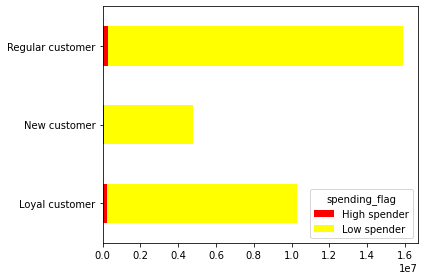

In [77]:
# Comparing the spending habits of loyalty groups

loyalty_spending_sbar = df.groupby('loyalty_flag')['spending_flag'].value_counts().unstack().plot.barh(stacked = True, ylabel = 'Number of Users',xlabel = '', color = ['red', 'yellow', 'orange'])

In [78]:
# Exporting loyalty spending bar chart

loyalty_spending_sbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spending_sbar.png'))

### 6.3 Are there differences in ordering habits based on a customer's region?


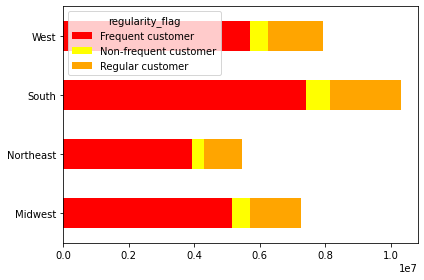

In [80]:
# Comparing the order frequency of the users by region

region_regularity_sbar = df.groupby('Region')['regularity_flag'].value_counts().unstack().plot.barh(stacked = True, ylabel = 'Number of Users',xlabel = '', color = ['red', 'yellow', 'orange'])

In [86]:
# Moving the legend outside of the plot

region_regularity_sbar.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [87]:
# Exporting the region_regularity_sbar

region_regularity_sbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_frequency_sbar.png'))

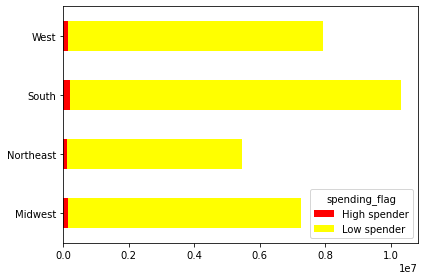

In [89]:
# Creating a chart comparing region & spending_flag

region_spending_sbar = df.groupby('Region')['spending_flag'].value_counts().unstack().plot.barh(stacked = True, ylabel = 'Number of Users',xlabel = '', color = ['red', 'yellow', 'orange'])

In [90]:
# Moving the legend outside of the plot

region_spending_sbar.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [91]:
# Exporting the region_spending_sbar

region_spending_sbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_sbar.png'))

In [94]:
age_frequency = pd.crosstab(index=df['age_group'], columns=df['regularity_flag'], normalize="index")

#creating cross tab to display labels

age_frequency_labels = pd.crosstab(index=df['age_group'],columns=df['regularity_flag'])

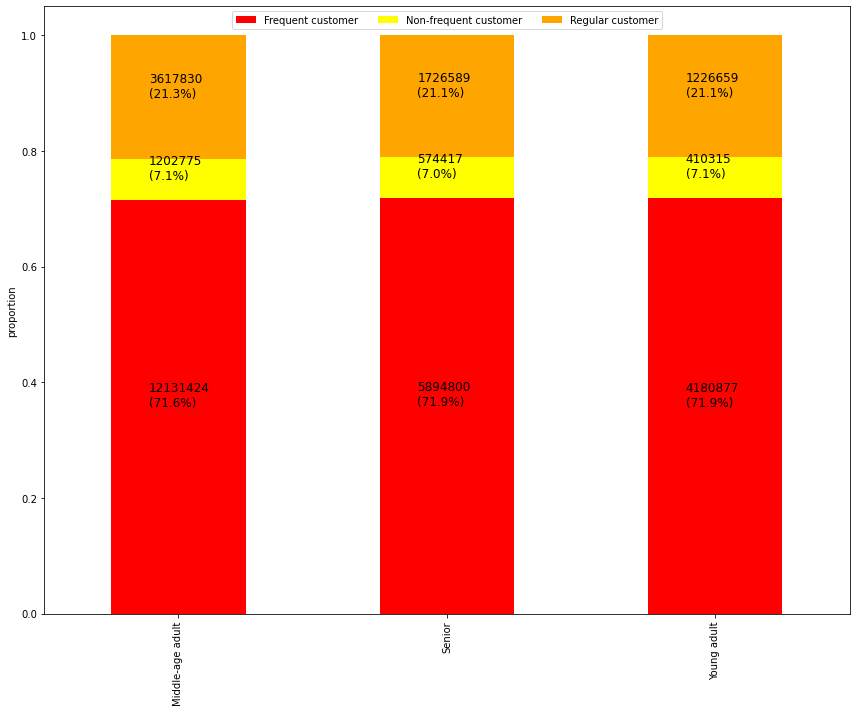

In [98]:
# Creating chart to show distribution of regularity_flag by region

age_frequency_dist=age_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*age_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_frequency.loc[y],
                                        age_frequency_labels.loc[y],
                                          age_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [99]:
# Exporting age_frequency_dist

age_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age__sbar.png'))

In [101]:
age_spending = pd.crosstab(index=df['age_group'], columns=df['spending_flag'], normalize="index")

age_spending_labels = pd.crosstab(index=df['age_group'],columns=df['spending_flag'])

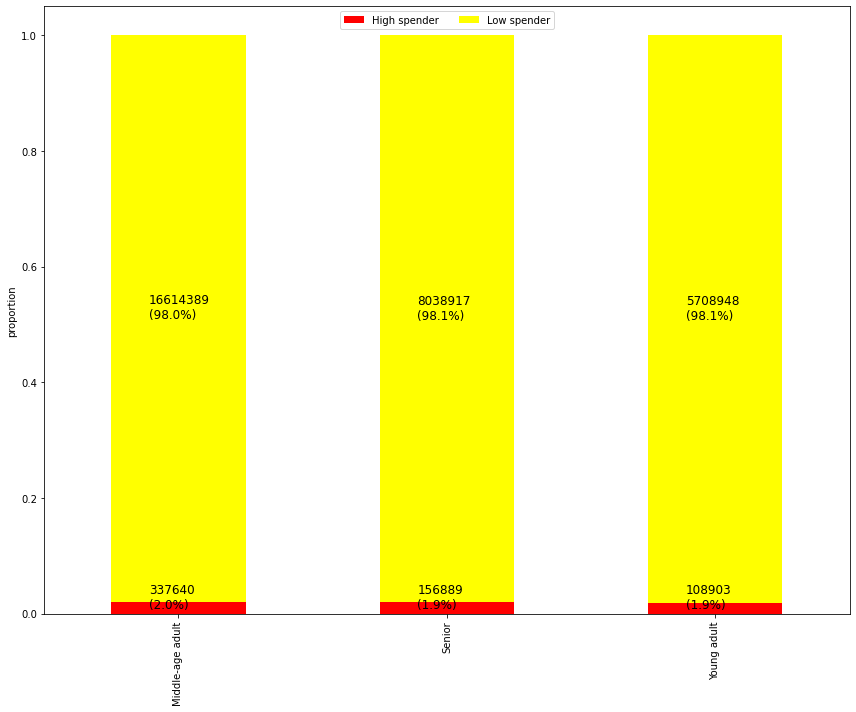

In [102]:
# Creating chart to show distribution of regularity_flag by region

age_spending_dist=age_spending.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*age_spending_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_spending.loc[y],
                                        age_spending_labels.loc[y],
                                          age_spending.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [103]:
# Exporting age_spending_dist

age_spending_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_spending_sbar.png'))

In [110]:
fam_regularity = pd.crosstab(index=df['fam_status'], columns=df['regularity_flag'], normalize="index")

fam_regularity_labels = pd.crosstab(index=df['fam_status'],columns=df['regularity_flag'])

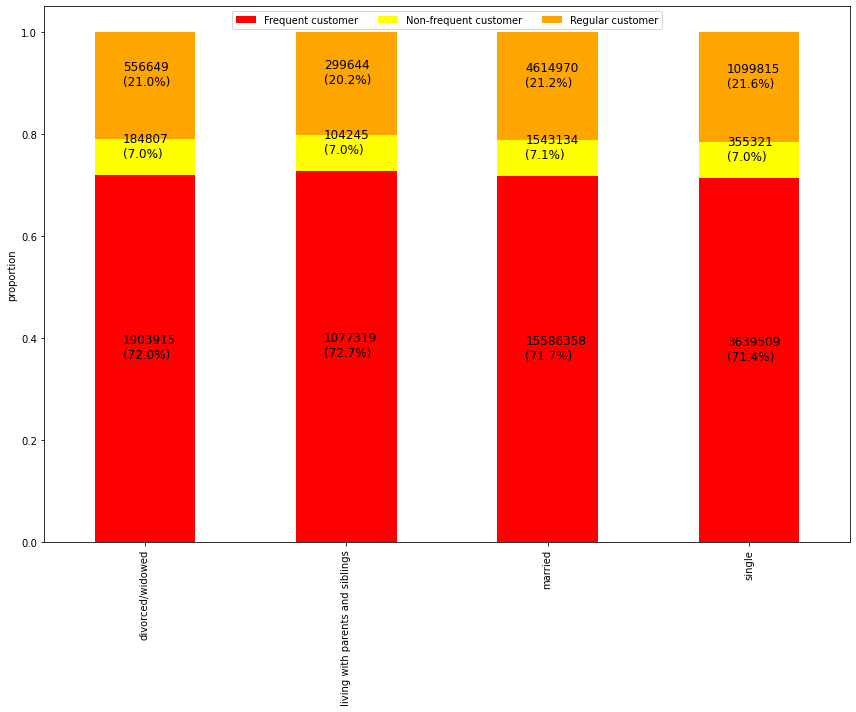

In [111]:
# Creating chart to show distribution of regularity_flag by region

fam_regularity_dist=fam_regularity.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*fam_regularity_labels.index.values]):
    for (proportion, count, x_loc) in zip(fam_regularity.loc[y],
                                        fam_regularity_labels.loc[y],
                                          fam_regularity.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [112]:
fam_regularity_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_regularity.png'))

In [113]:
fam_spending = pd.crosstab(index=df['fam_status'], columns=df['spending_flag'], normalize="index")

fam_spending_labels = pd.crosstab(index=df['fam_status'],columns=df['spending_flag'])

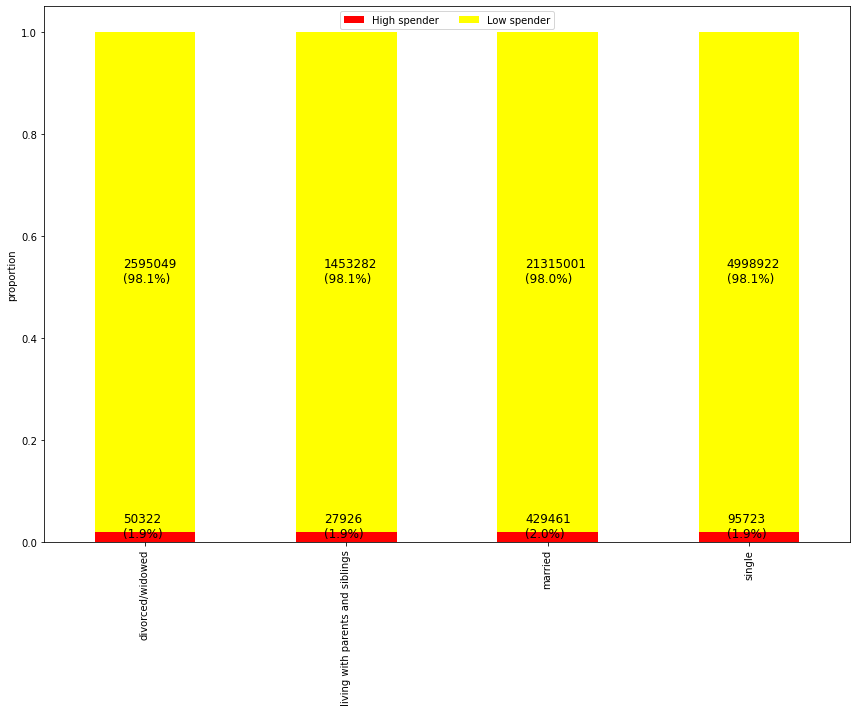

In [114]:
# Creating chart to show distribution of regularity_flag by region

fam_spending_dist=fam_spending.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*fam_spending_labels.index.values]):
    for (proportion, count, x_loc) in zip(fam_spending.loc[y],
                                        fam_spending_labels.loc[y],
                                          fam_spending.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [115]:
fam_spending_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_spending.png'))

# 7. Additional Visualizations

## 7.1 Age

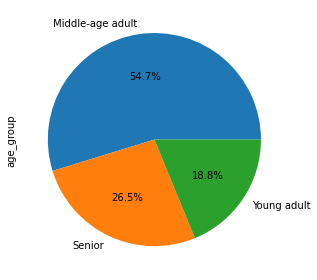

In [116]:
# Creating a pie chart to show the distribution of price ranges

age_pie = df['age_group'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [118]:
# Removing the y-axis label

age_pie.yaxis.set_visible(False)

In [119]:
age_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_pie.png'))

In [120]:
age_loyal = pd.crosstab(index=df['age_group'], columns=df['loyalty_flag'], normalize="index")

#creating cross tab to display labels

age_loyal_labels = pd.crosstab(index=df['age_group'],columns=df['loyalty_flag'])           

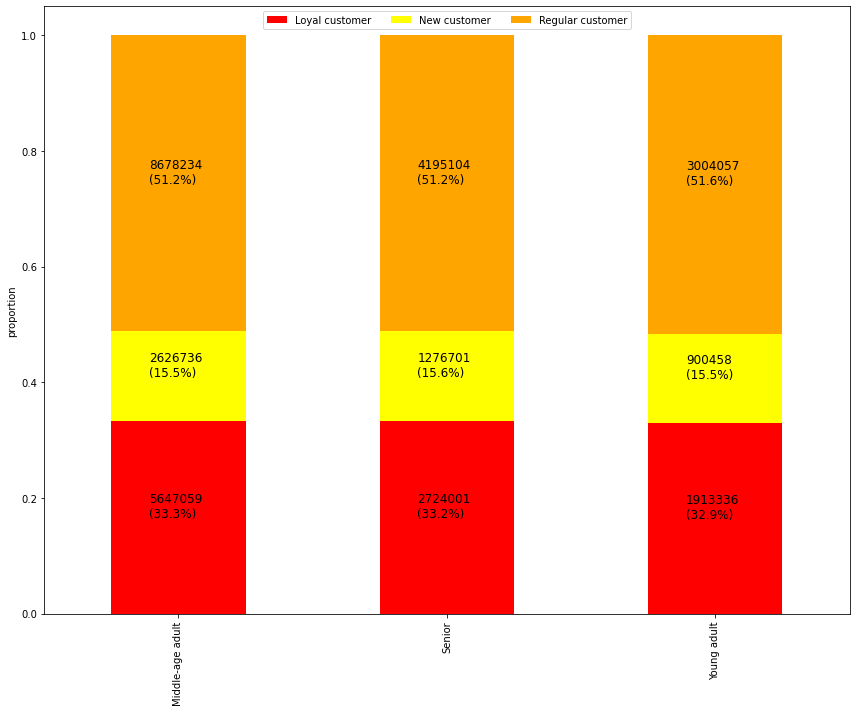

In [121]:
# Creating chart to show distribution of regularity_flag by region

age_loyal_dist=age_loyal.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*age_loyal_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_loyal.loc[y],
                                        age_loyal_labels.loc[y],
                                          age_loyal.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [123]:
age_loyal_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_loyal.png'))

In [141]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [142]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [144]:
# Creating a subset of 30% of data from df to make line graph

small_df = df[~dev]

In [146]:
# Creating a subset of just the 'prices' & 'order_hour_of_day' columns

df_30 = small_df[['Age','income']]

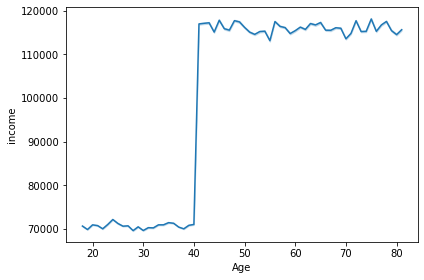

In [147]:
age_income_line = sns.lineplot(data = df_30, x = 'Age', y = 'income')

In [148]:
age_income_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_line.png'))

## 7.2 Income

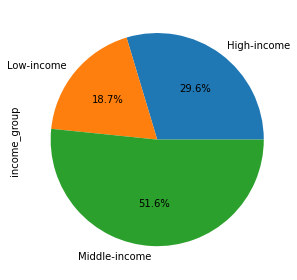

In [129]:
income_pie = df['income_group'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [130]:
# Removing the y-axis label

income_pie.yaxis.set_visible(False)

In [131]:
income_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_pie.png'))

In [132]:
income_spending = pd.crosstab(index=df['income_group'], columns=df['spending_flag'], normalize="index")

income_spending_labels = pd.crosstab(index=df['income_group'],columns=df['spending_flag'])

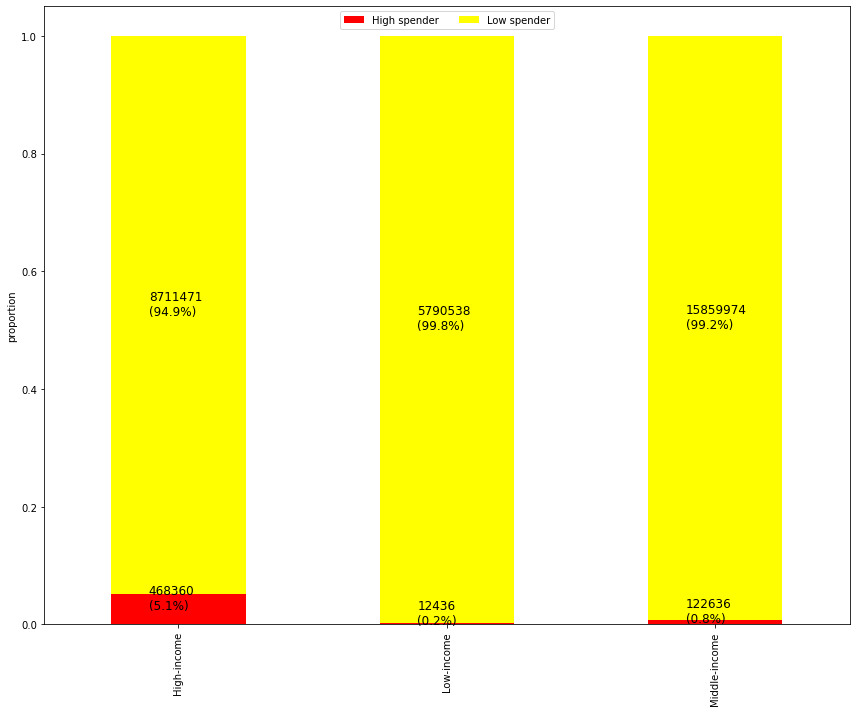

In [133]:
# Creating chart to show distribution of spending_flag by income group

income_spending_dist=income_spending.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*income_spending_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_spending.loc[y],
                                        income_spending_labels.loc[y],
                                          income_spending.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [134]:
# Exporting age_loyal_dist

income_spending_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_spending.png'))

In [135]:
income_loyal = pd.crosstab(index=df['income_group'], columns=df['loyalty_flag'], normalize="index")

#creating cross tab to display labels

income_loyal_labels = pd.crosstab(index=df['income_group'],columns=df['loyalty_flag'])           

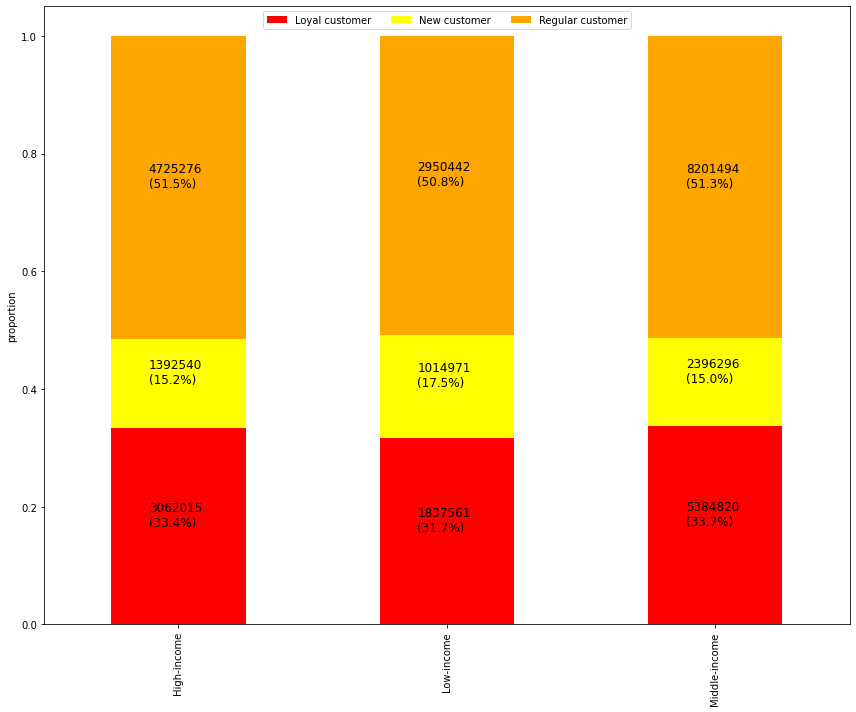

In [136]:
# Creating chart to show distribution of loyalty_flag by income group

income_loyal_dist=income_loyal.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*income_loyal_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_loyal.loc[y],
                                        income_loyal_labels.loc[y],
                                          income_loyal.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [137]:
# Exporting age_loyal_dist

income_loyal_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_loyal_dist.png'))

In [149]:
# Creating a subset of just the 'prices' & 'order_hour_of_day' columns
df_2 = small_df[['number_of_dependants','income']]

In [151]:
income_fam = pd.crosstab(index=df['income_group'], columns=df['fam_status'], normalize="index")

#creating cross tab to display labels

income_fam_labels = pd.crosstab(index=df['income_group'],columns=df['fam_status'])           

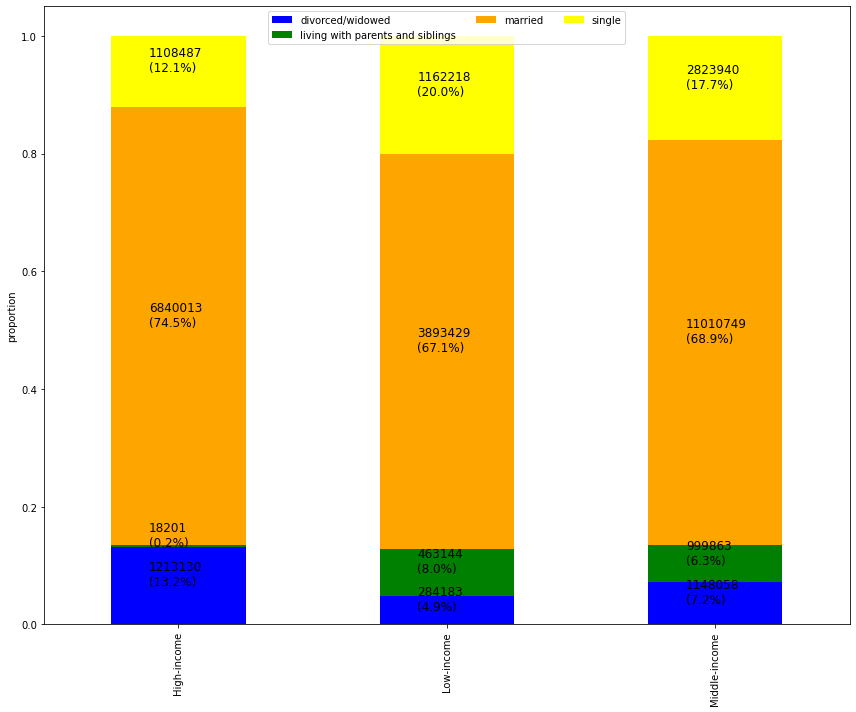

In [154]:
# Creating chart to show distribution of loyalty_flag by income group

income_fam_dist=income_fam.plot(kind='bar', 
                        stacked=True, 
                        color=['blue','green','orange', 'yellow'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*income_fam_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_fam.loc[y],
                                        income_fam_labels.loc[y],
                                          income_fam.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [155]:
# Exporting income_fam_dist

income_fam_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_fam_dist.png'))

## 7.3 Family Status

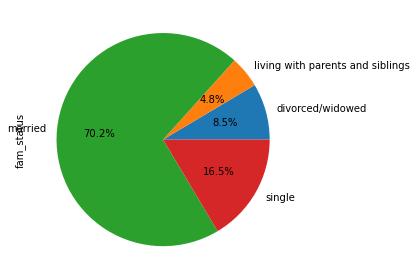

In [156]:
fam_pie = df['fam_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [159]:
# Removing the y-axis label

fam_pie.yaxis.set_visible(False)

In [161]:
# Exporting family status pie chart

fam_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_pie.png'))

## 7.4 Parents

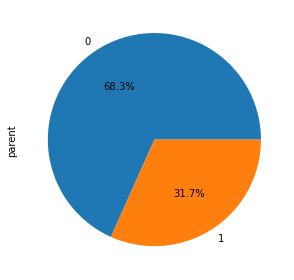

In [164]:
parent_pie = df['parent'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [167]:
# Removing the y-axis label

parent_pie.yaxis.set_visible(False)

In [168]:
# Exporting family status pie chart

parent_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_pie.png'))

In [169]:
parent_loyal = pd.crosstab(index=df['parent'], columns=df['loyalty_flag'], normalize="index")

#creating cross tab to display labels

parent_loyal_labels = pd.crosstab(index=df['parent'],columns=df['loyalty_flag'])        

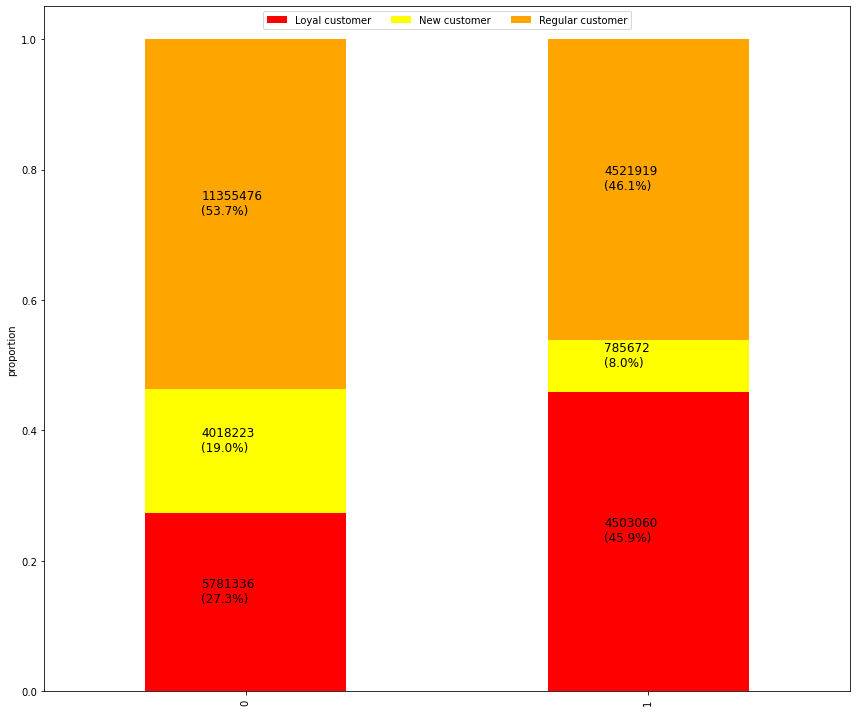

In [170]:
# Creating chart to show distribution of loyalty_flag by parent group

parent_loyal_dist=parent_loyal.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*parent_loyal_labels.index.values]):
    for (proportion, count, x_loc) in zip(parent_loyal.loc[y],
                                        parent_loyal_labels.loc[y],
                                          parent_loyal.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [171]:
# Exporting parent loyalty chart

parent_loyal_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_loyal_dist.png'))

In [172]:
parent_spending = pd.crosstab(index=df['parent'], columns=df['spending_flag'], normalize="index")

parent_spending_labels = pd.crosstab(index=df['parent'],columns=df['spending_flag'])

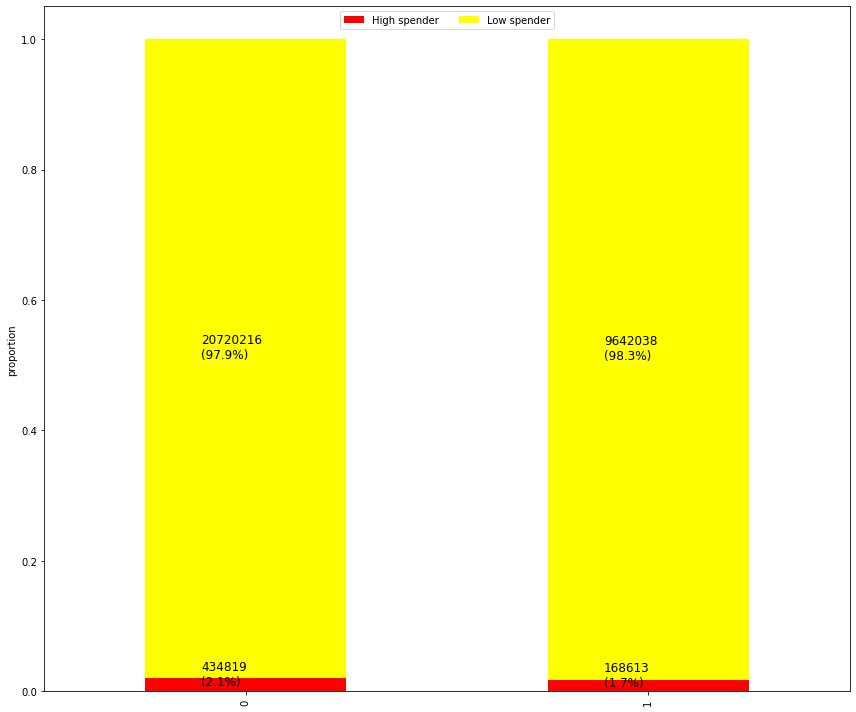

In [173]:
# Creating chart to show distribution of spending_flag by parent group

parent_spending_dist=parent_spending.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*parent_spending_labels.index.values]):
    for (proportion, count, x_loc) in zip(parent_spending.loc[y],
                                        parent_spending_labels.loc[y],
                                          parent_spending.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [174]:
# Exporting parent spending chart

parent_spending_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_spending_dist.png'))

## 7.5 Pet Owners

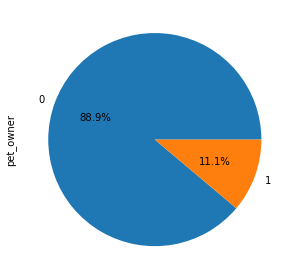

In [194]:
pet_pie = df['pet_owner'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [195]:
# Removing the y-axis label

pet_pie.yaxis.set_visible(False)

In [205]:
# Exporting pet pie chart

pet_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_pie.png'))

In [182]:
pet_loyal = pd.crosstab(index=df['pet_owner'], columns=df['loyalty_flag'], normalize="index")

#creating cross tab to display labels

pet_loyal_labels = pd.crosstab(index=df['pet_owner'],columns=df['loyalty_flag'])        

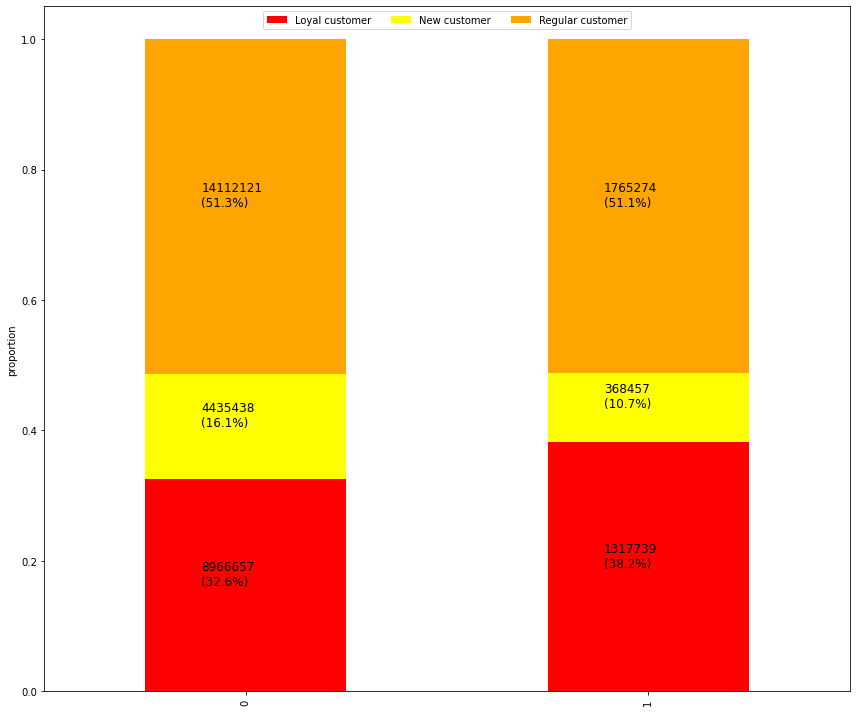

In [183]:
# Creating chart to show distribution of loyalty_flag by pet owner group

pet_loyal_dist=pet_loyal.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*pet_loyal_labels.index.values]):
    for (proportion, count, x_loc) in zip(pet_loyal.loc[y],
                                        pet_loyal_labels.loc[y],
                                          pet_loyal.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [184]:
# Exporting pet owner loyalty chart

pet_loyal_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_loyal_dist.png'))

In [185]:
pet_spending = pd.crosstab(index=df['pet_owner'], columns=df['spending_flag'], normalize="index")

pet_spending_labels = pd.crosstab(index=df['pet_owner'],columns=df['spending_flag'])

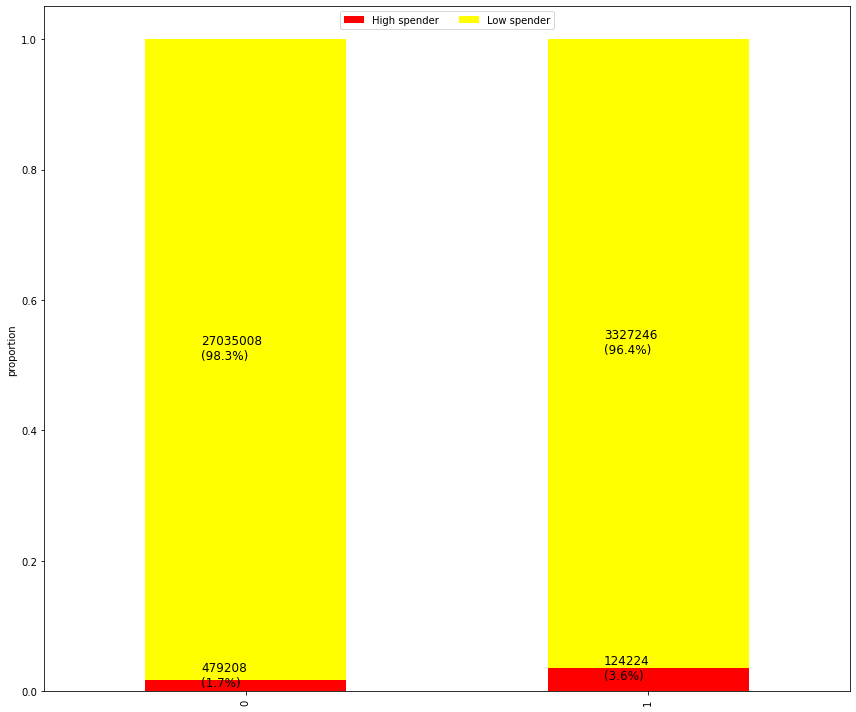

In [186]:
# Creating chart to show distribution of spending_flag by parent group

pet_spending_dist=pet_spending.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*pet_spending_labels.index.values]):
    for (proportion, count, x_loc) in zip(pet_spending.loc[y],
                                        pet_spending_labels.loc[y],
                                          pet_spending.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [187]:
# Exporting pet owner loyalty chart

pet_spending_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_spending_dist.png'))

## 7.6 Alcohol Consumers

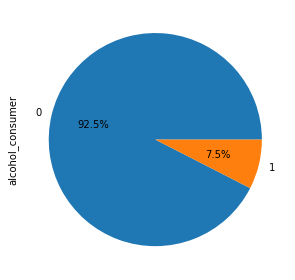

In [197]:
alc_pie = df['alcohol_consumer'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [198]:
# Removing the y-axis label

alc_pie.yaxis.set_visible(False)

In [204]:
# Exporting alcohol consumer pie chart

alc_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alc_pie.png'))

In [202]:
alc_loyal = pd.crosstab(index=df['alcohol_consumer'], columns=df['loyalty_flag'], normalize="index")

#creating cross tab to display labels

alc_loyal_labels = pd.crosstab(index=df['alcohol_consumer'],columns=df['loyalty_flag'])        

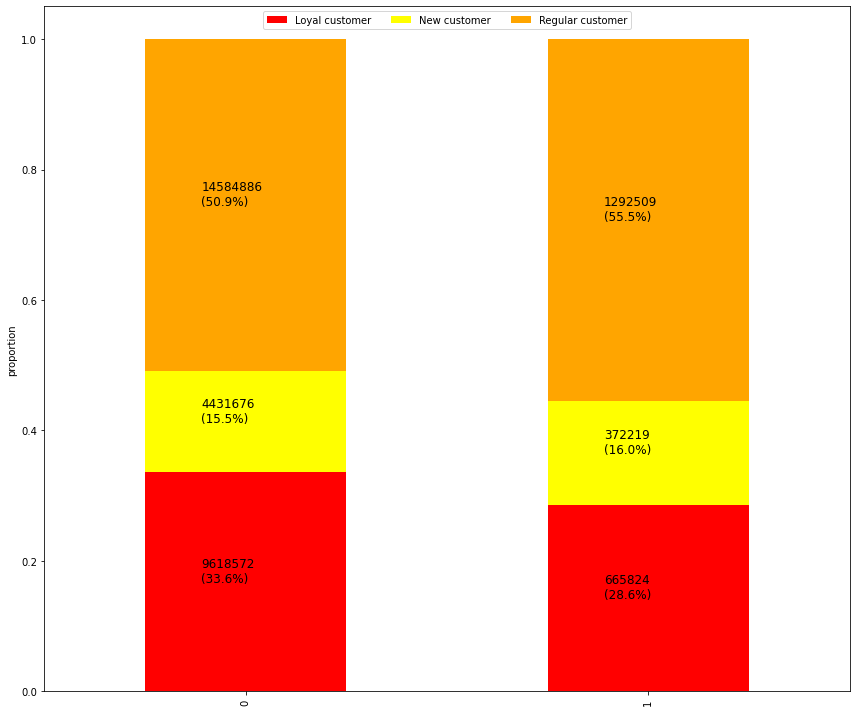

In [203]:
# Creating chart to show distribution of loyalty_flag by alcohol consumer group

alc_loyal_dist=alc_loyal.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*alc_loyal_labels.index.values]):
    for (proportion, count, x_loc) in zip(alc_loyal.loc[y],
                                        alc_loyal_labels.loc[y],
                                          alc_loyal.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [207]:
# Exporting alcohol consumer loyalty chart

alc_loyal_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alc_loyal.png'))

In [208]:
alc_spending = pd.crosstab(index=df['alcohol_consumer'], columns=df['spending_flag'], normalize="index")

alc_spending_labels = pd.crosstab(index=df['alcohol_consumer'],columns=df['spending_flag'])

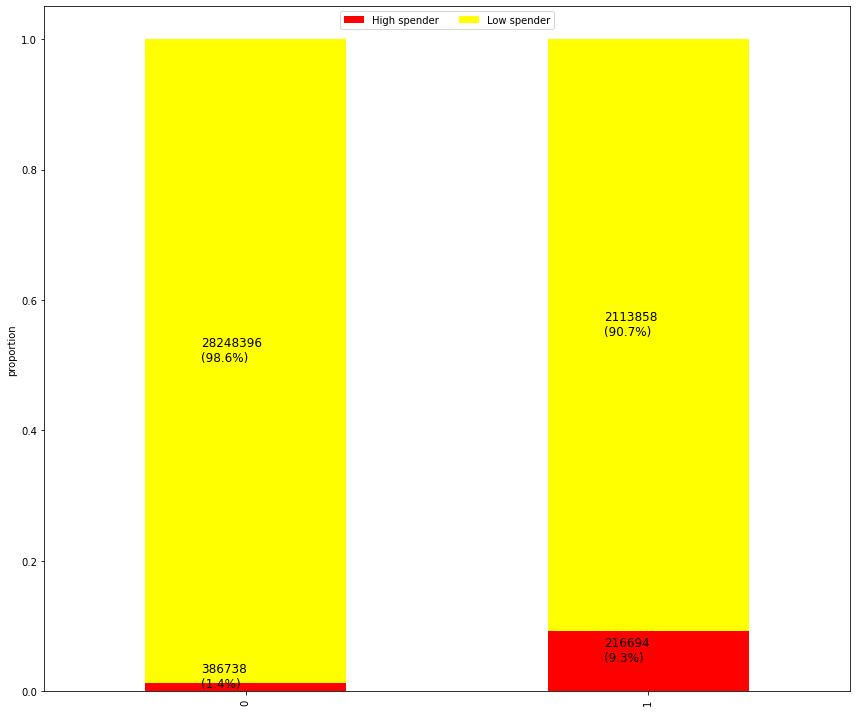

In [209]:
# Creating chart to show distribution of spending_flag by parent group

alc_spending_dist=alc_spending.plot(kind='bar', 
                        stacked=True, 
                        color=['red','yellow','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("")


for n, y in enumerate([*alc_spending_labels.index.values]):
    for (proportion, count, x_loc) in zip(alc_spending.loc[y],
                                        alc_spending_labels.loc[y],
                                          alc_spending.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

In [210]:
# Exporting alcohol consumer spending chart

alc_spending_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alc_spending.png'))